In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
nltk.download("punkt")
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\essam\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\essam\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
sp = pd.read_csv("spam.csv", encoding='latin1')

In [3]:
sp.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
sp.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1, inplace=True)

In [5]:
sp.isnull().sum()

v1    0
v2    0
dtype: int64

In [6]:
sp.tail()

,v1,v2
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [7]:
sp.rename(columns={"v1":"traget","v2":"text"},inplace=True)
sp.head()

,traget,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
sp["text"].duplicated().sum()

403

In [9]:
sp.drop_duplicates(keep="first")

,traget,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


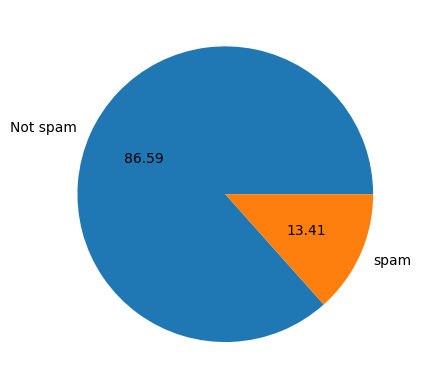

In [10]:
plt.pie(sp["traget"].value_counts(),labels=["Not spam","spam"],autopct="%0.2f")
plt.show()

##3.Data preprocessing##

1.   Lower case
2.   tokenize
3. Removing special character(!@#$%^^&)
4.Removing stop words and punctuation
5.stamming





In [11]:
def transform_text(text):
  text=text.lower()#1
  text=nltk.word_tokenize(text)#2
  z=[]#3
  for i in text:
    if i.isalnum():
      z.append(i)
  text=z[:]#4
  z.clear()
  for i in text:
    if i not in stop_words :
         z.append(i)
  text=z[:]#5
  z.clear()
  for i in text:
    z.append(stemmer.stem(i))
  return " ".join(z)

In [12]:
stop_words=stopwords.words('english')
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()
stemmer.stem("helloing")

'hello'

In [13]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [14]:
sp['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [15]:
sp["transform_text"]=sp["text"].apply(transform_text)
sp.head()

,traget,text,transform_text
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...
1,ham,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entri 2 wkli comp win fa cup final tkt 21...
3,ham,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think goe usf live around though


##4.Model Building

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
co=CountVectorizer()
x=co.fit_transform(sp["transform_text"]).toarray()
print(x.shape)
label=LabelEncoder()
y=label.fit_transform(sp["traget"])
y.shape

(5572, 6708)


(5572,)

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

In [18]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(4457, 6708) (1115, 6708) (4457,) (1115,)


In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,precision_score

In [20]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [21]:
clfs = {
    'SVC' : svc,
    'KNeighborsClassifier' : knc,
    'MultinomialNB': mnb,
    'DecisionTreeClassifier': dtc,
    'LogisticRegression': lrc,
    'RandomForestClassifier': rfc,
    'AdaBoostClassifier': abc,
    'BaggingClassifier': bc,
    'ExtraTreesClassifier': etc,
    'GradientBoostingClassifier':gbdt,
    'XGBClassifier':xgb
}

In [22]:
def train_classifier(clf,x_train,y_train,x_test,y_test):
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision

In [23]:
train_classifier(svc,x_train,y_train,x_test,y_test)

(0.9139013452914798, 0.6827586206896552)

In [24]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():

    current_accuracy,current_precision = train_classifier(clf, x_train,y_train,x_test,y_test)

    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9139013452914798
Precision -  0.6827586206896552
For  KNeighborsClassifier
Accuracy -  0.9139013452914798
Precision -  1.0
For  MultinomialNB
Accuracy -  0.9802690582959641
Precision -  0.9205298013245033
For  DecisionTreeClassifier
Accuracy -  0.9219730941704036
Precision -  0.9305555555555556
For  LogisticRegression
Accuracy -  0.9775784753363229
Precision -  0.9626865671641791
For  RandomForestClassifier
Accuracy -  0.9704035874439462
Precision -  1.0
For  AdaBoostClassifier
Accuracy -  0.9623318385650225
Precision -  0.928
For  BaggingClassifier
Accuracy -  0.967713004484305
Precision -  0.952
For  ExtraTreesClassifier
Accuracy -  0.9757847533632287
Precision -  1.0
For  GradientBoostingClassifier
Accuracy -  0.9488789237668162
Precision -  0.9423076923076923
For  XGBClassifier
Accuracy -  0.9721973094170404
Precision -  0.9538461538461539


In [25]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores})

In [26]:
performance_df

,Algorithm,Accuracy,Precision
0,SVC,0.913901,0.682759
1,KNeighborsClassifier,0.913901,1.000000
2,MultinomialNB,0.980269,0.920530
3,DecisionTreeClassifier,0.921973,0.930556
4,LogisticRegression,0.977578,0.962687
5,RandomForestClassifier,0.970404,1.000000
6,AdaBoostClassifier,0.962332,0.928000
7,BaggingClassifier,0.967713,0.952000
8,ExtraTreesClassifier,0.975785,1.000000
9,GradientBoostingClassifier,0.948879,0.942308


In [27]:
from sklearn.metrics._plot.confusion_matrix import confusion_matrix
lo=LogisticRegression()
lo.fit(x_train,y_train)
y_pred = clf.predict(x_test)
accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
print(confusion_matrix(y_test,y_pred),accuracy,precision)

[[960   6]
 [ 25 124]] 0.9721973094170404 0.9538461538461539


In [28]:
import pickle
pickle.dump(co,open('vectorizer.pkl','wb'))
pickle.dump(lo,open('model.pkl','wb'))